<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Google%20Stock%20Price%20Prediction%20Using%20RNN-LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Google Stock Price Prediction Using RNN-LSTM**

**Steps**
 - Data Preprocessing
 - Building the RNN
 - Making predictions and Visualization

**Import Libraries**

In [4]:
import tensorflow as tf
from tensorflow import keras

**Load Dataset**

In [80]:
import pandas as pd
batch_size = 32
seed = 42

data = pd.read_csv("data/google-stock-price.csv", date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


**Train and Test Split**

In [81]:
data_training = data[data["Date"] < "2019-01-01"].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [82]:
data_test = data[data["Date"] >= "2019-01-01"].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
4060,2020-10-05,1466.209961,1488.209961,1464.270020,1486.020020,1486.020020,1113300
4061,2020-10-06,1475.579956,1486.760010,1448.589966,1453.439941,1453.439941,1245400
4062,2020-10-07,1464.290039,1468.959961,1436.000000,1460.290039,1460.290039,1746200
4063,2020-10-08,1465.089966,1490.000000,1465.089966,1485.930054,1485.930054,1187800


In [83]:
training_data = data_training.drop(["Date", "Adj Close"], axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


**Normalize Dataset**

In [88]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
training_data = scaler.fit_transform(training_data)

**Build Training Dataset**

In [89]:
x_train = []
y_train = []

training_data.shape, training_data.shape[0]

# Splitting data in chunks of 60
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i - 60 : i])
    y_train.append(training_data[i, 0])  # Open is what we are pridicting or is our outcome

In [90]:
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)

In [91]:
x_train.shape, y_train.shape

((3557, 60, 5), (3557,))

**Building LSTM**

In [92]:
from keras import activations

In [93]:
input_shape = x_train.shape[1], x_train.shape[2]

In [94]:
inputs = keras.Input(shape=(input_shape))

x = keras.layers.LSTM(units=50, activation=activations.relu, return_sequences=True)(inputs)
x = keras.layers.Dropout(0.2)(x)

x = keras.layers.LSTM(units=60, activation=activations.relu, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)

x = keras.layers.LSTM(units=80, activation=activations.relu, return_sequences=True)(x)
x = keras.layers.Dropout(0.4)(x)

x = keras.layers.LSTM(units=120, activation=activations.relu,)(x)
x = keras.layers.Dropout(0.3)(x)

outputs = keras.layers.Dense(units=1)(x)

model = keras.Model(inputs=inputs, outputs=[outputs], name="lstm")

model.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 60, 5)]           0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_21 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_23 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_22 (Dropout)        (None, 60, 80)            0      

In [95]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [97]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
112/112 [==============================] - 9s 78ms/step - loss: 0.0015
Epoch 2/10
112/112 [==============================] - 10s 85ms/step - loss: 0.0016
Epoch 3/10
112/112 [==============================] - 10s 94ms/step - loss: 0.0014
Epoch 4/10
112/112 [==============================] - 11s 102ms/step - loss: 0.0015
Epoch 5/10
112/112 [==============================] - 13s 113ms/step - loss: 0.0014
Epoch 6/10
112/112 [==============================] - 14s 124ms/step - loss: 0.0013
Epoch 7/10
112/112 [==============================] - 16s 139ms/step - loss: 0.0013
Epoch 8/10
112/112 [==============================] - 19s 173ms/step - loss: 0.0012
Epoch 9/10
112/112 [==============================] - 18s 162ms/step - loss: 0.0014
Epoch 10/10
112/112 [==============================] - 17s 152ms/step - loss: 0.0011


**Prepare Test Dataset**

In [98]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


To predict the Open price of the stock for the current data we need to look at the last 60 days data.

In [99]:
past_60_days = data_training.tail(60)

In [100]:
df = past_60_days.append(data_test, ignore_index=True)
df = df.drop(["Date", "Adj Close"], axis=1)
df.head()

C:\Users\sahug\AppData\Local\Temp\ipykernel_37388\243254226.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(data_test, ignore_index=True)


,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [101]:
inputs = scaler.transform(df)
inputs

c:\Users\sahug\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[1.19532996e+03, 1.19751001e+03, 1.15557605e+03, 1.16818994e+03,
        2.20950000e+06],
       [1.16750000e+03, 1.17350000e+03, 1.14512000e+03, 1.15734998e+03,
        1.18430000e+06],
       [1.15010999e+03, 1.16800000e+03, 1.12736401e+03, 1.14896997e+03,
        1.93240000e+06],
       ...,
       [1.46429004e+03, 1.46895996e+03, 1.43600000e+03, 1.46029004e+03,
        1.74620000e+06],
       [1.46508997e+03, 1.49000000e+03, 1.46508997e+03, 1.48593005e+03,
        1.18780000e+06],
       [1.49469995e+03, 1.51652002e+03, 1.48944995e+03, 1.51521997e+03,
        1.43530000e+06]])

In [102]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i - 60 : i])
    y_test.append(inputs[i, 0])

In [103]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((448, 60, 5), (448,))

In [104]:
y_pred = model.predict(x_test)

In [105]:
y_pred

array([[-6.85709688e+04],
       [-1.02920641e+05],
       [ 7.22237938e+05],
       [ 1.85659395e+04],
       [-4.27705875e+05],
       [ 7.72568984e+04],
       [ 2.14877109e+05],
       [ 6.33579250e+06],
       [-8.96559062e+04],
       [ 3.86930875e+05],
       [ 1.83199406e+05],
       [ 2.94453156e+05],
       [ 2.09630031e+05],
       [-1.31839266e+05],
       [-2.21445781e+05],
       [-1.01011586e+05],
       [ 3.40115531e+05],
       [ 3.54403812e+05],
       [ 1.09287238e+06],
       [-3.87119938e+05],
       [ 2.95184219e+05],
       [ 6.48086133e+03],
       [-8.46608438e+05],
       [ 6.58895000e+04],
       [ 3.32907383e+04],
       [ 8.70944750e+05],
       [-7.71901875e+04],
       [-3.23217281e+05],
       [-8.50892500e+04],
       [-6.04312312e+05],
       [ 5.87874938e+05],
       [ 3.73320547e+04],
       [ 1.43160625e+05],
       [-4.05733828e+04],
       [-1.61145107e+04],
       [-3.58943969e+05],
       [ 2.68484000e+05],
       [-2.96046699e+04],
       [ 1.6

**Reverse Scaling to Original Values**

In [106]:
scaler.scale_

array([1., 1., 1., 1., 1.])

In [107]:
scale = 1 / 8.18605127e-04
scale

1221.5901990069017

In [108]:
y_pred = y_pred * scale
y_test = y_test * scale

In [109]:
y_pred

array([[-8.37656240e+07],
       [-1.25726848e+08],
       [ 8.82278784e+08],
       [ 2.26799700e+07],
       [-5.22481312e+08],
       [ 9.43762720e+07],
       [ 2.62491776e+08],
       [ 7.73974221e+09],
       [-1.09522776e+08],
       [ 4.72670976e+08],
       [ 2.23794608e+08],
       [ 3.59701088e+08],
       [ 2.56082000e+08],
       [-1.61053552e+08],
       [-2.70516000e+08],
       [-1.23394768e+08],
       [ 4.15481792e+08],
       [ 4.32936224e+08],
       [ 1.33504218e+09],
       [-4.72901920e+08],
       [ 3.60594144e+08],
       [ 7.91695700e+06],
       [-1.03420858e+09],
       [ 8.04899680e+07],
       [ 4.06676400e+07],
       [ 1.06393760e+09],
       [-9.42947760e+07],
       [-3.94839072e+08],
       [-1.03944192e+08],
       [-7.38222016e+08],
       [ 7.18142272e+08],
       [ 4.56044720e+07],
       [ 1.74883616e+08],
       [-4.95640480e+07],
       [-1.96853280e+07],
       [-4.38482432e+08],
       [ 3.27977440e+08],
       [-3.61647760e+07],
       [ 2.0

In [110]:
y_test

array([1241831.95715558, 1271675.39716618, 1261401.78205847,
       1308933.8982359 , 1314565.41072946, 1321333.06807398,
       1304243.03340578, 1298770.33374603, 1278907.26489427,
       1282877.43304105, 1319317.41492745, 1318669.93669586,
       1343749.21890759, 1329090.13651951, 1316080.17158192,
       1315017.39299515, 1325425.36592249, 1319451.77152549,
       1310375.44063659, 1305183.68229081, 1347413.98950461,
       1358896.96669344, 1359214.59236109, 1374093.47791686,
       1392087.47711642, 1348831.07566953, 1327868.5463205 ,
       1340023.3089427 , 1352056.09211876, 1374276.74576487,
       1365798.98185759, 1380494.59834375, 1355965.12089766,
       1368168.79476984, 1356991.21513076, 1344848.67940486,
       1363294.6620917 , 1350773.36255188, 1352239.21093277,
       1357553.24801429, 1374166.84418103, 1401151.73014302,
       1404902.0963437 , 1420086.37822763, 1411816.18937014,
       1376402.30049524, 1398048.84339553, 1439350.88009777,
       1466696.18891845,

**Visualization**

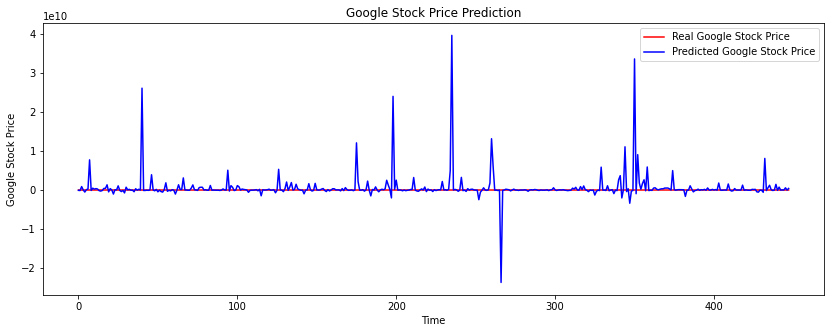

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y_test, color="red", label="Real Google Stock Price")
plt.plot(y_pred, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()